In [201]:
import os
os.getcwd()

'C:\\Users\\guy74\\Documents\\NU Stuff\\ANA500\\ANA500_MicroProject'

In [202]:
import pandas as pd
import numpy as np

#Load in the data
df = pd.read_csv("airline.csv")

#There is a column which is presumably actually not named in the source but at some point got hard coded into this .csv file with the name "Unnamed: 0"
#That variable is presumably not useful here analytically, and same goes for the "id" field. 
#The rest could serve useful and so we don't want to drop anything else yet at this point
df = df.drop(columns=["Unnamed: 0", "id"])
#print(df)

#Loop through each column and calculate some data integrity metrics for each one to output to a table
column_checks = []
total_rows = df.shape[0]
for col in df.columns:
    col_data = df[col]
    
    populated_count = col_data.notnull().sum()
    missing_count = col_data.isnull().sum()
    distinct_count = col_data.nunique(dropna=True)
    data_type = col_data.dtype
    
    column_checks.append({
        "Column": col,
        "Populated Values": populated_count,
        "Missing Values": missing_count,
        "Distinct Values": distinct_count,
        "Data Type": str(data_type)
    })

integrity_df = pd.DataFrame(column_checks)

#This can sort it by missing values if we want the highest of those to rise to the top for further investigation/decisions
#integrity_df = integrity_df.sort_values(by="Missing Values", ascending=False)


print(integrity_df.to_string(index=False))


                           Column  Populated Values  Missing Values  Distinct Values Data Type
                           Gender            129880               0                2    object
                    Customer Type            129880               0                2    object
                              Age            129880               0               75     int64
                   Type of Travel            129880               0                2    object
                            Class            129880               0                3    object
                  Flight Distance            129880               0             3821     int64
            Inflight wifi service            129880               0                6     int64
Departure/Arrival time convenient            129880               0                6     int64
           Ease of Online booking            129880               0                6     int64
                    Gate location            12988

In [203]:
#Let's also check for any duplicate rows where every single variable is exactly the same (BESIDES the id and blank ones we dropped already)
duplicate_count = df.duplicated().sum()
print(f"Total number of exact duplicate rows (excluding the two dropped columns): {duplicate_count}")

Total number of exact duplicate rows (excluding the two dropped columns): 0


In [204]:
#Swap out the column names so if any columns have spaces we change them to underscores instead:
# Replace all spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")
print(df)

        Gender      Customer_Type  Age   Type_of_Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
129875    Male  disloyal Customer   34  Business travel  Business   
129876    Male     Loyal Customer   23  Business travel  Business   
129877  Female     Loyal Customer   17  Personal Travel       Eco   
129878    Male     Loyal Customer   14  Business travel  Business   
129879  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight_Distance  Inflight_wifi_service  \
0                   460                      3   
1                   235                      3   
2                  11

In [205]:
#If/when needed, export the new version of the file to another named .csv for further exploration manaully in Excel, sharing, whatever else
df.to_csv('AirlineSatisfaction_Transformed.csv', index=False)

In [206]:
#This marks the end of week 1 and now continuing on for week 2

In [207]:
#Feeback from last week indicated:
#To strengthen your analysis, please dive deeper into your columns. 
#For example, explore how the Age variable is distributed overall and within satisfaction groups. 
#How many records are labeled as "satisfied" versus "unsatisfied"? What does the age distribution look like for each category? ...
#These insights can help guide your feature engineering and modeling steps. 

#Therefore below going to do a bit further exploratory analysis for distribution overall and within satisfaction groups 
#(for each column present in the dataset via a loop)

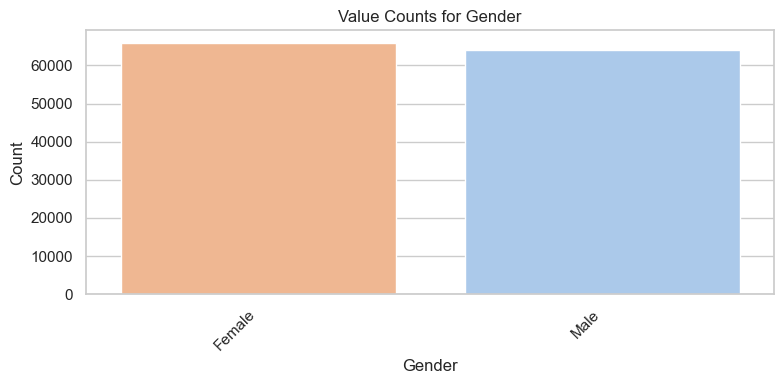

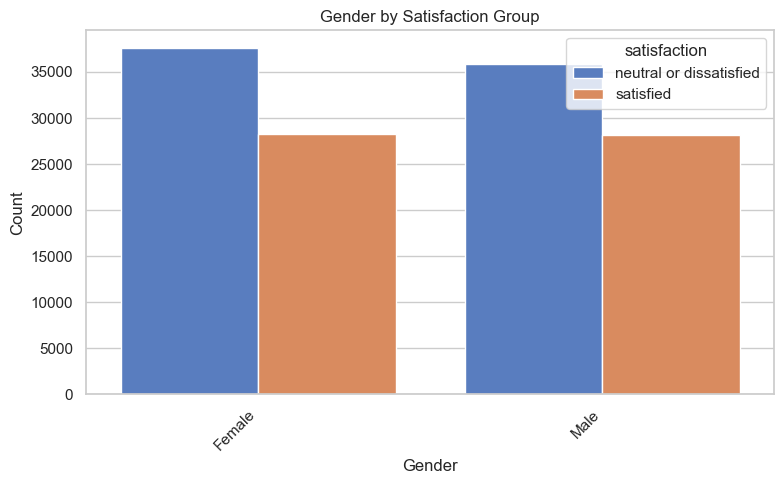

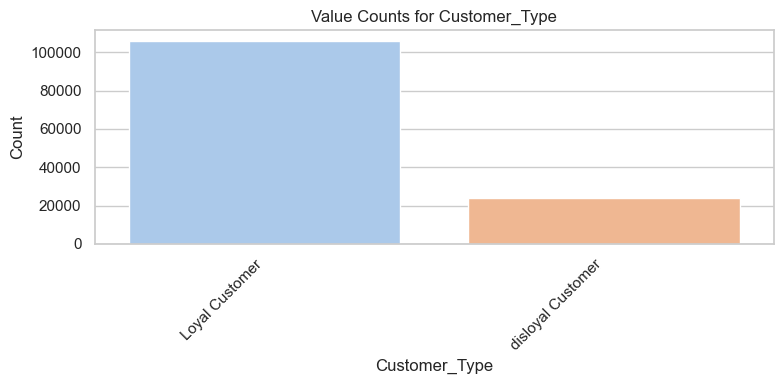

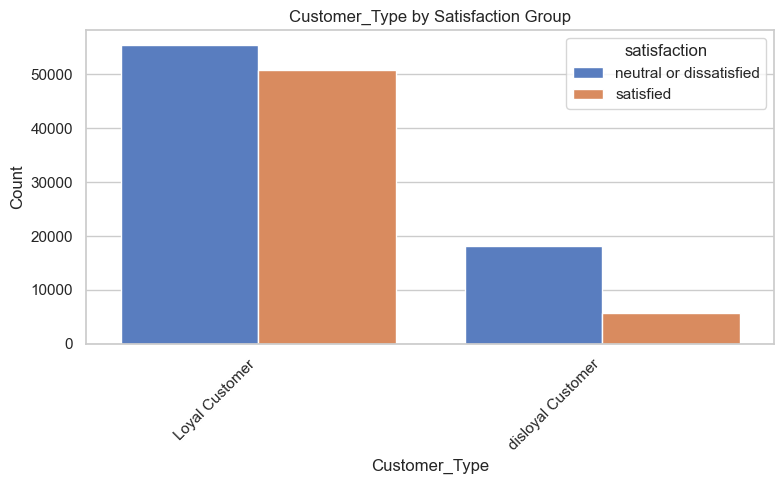

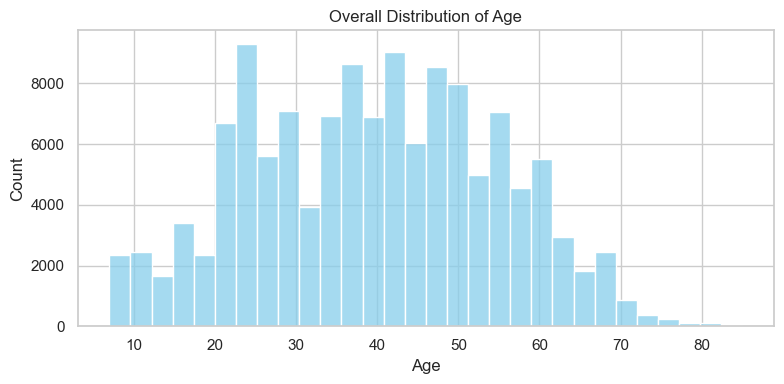

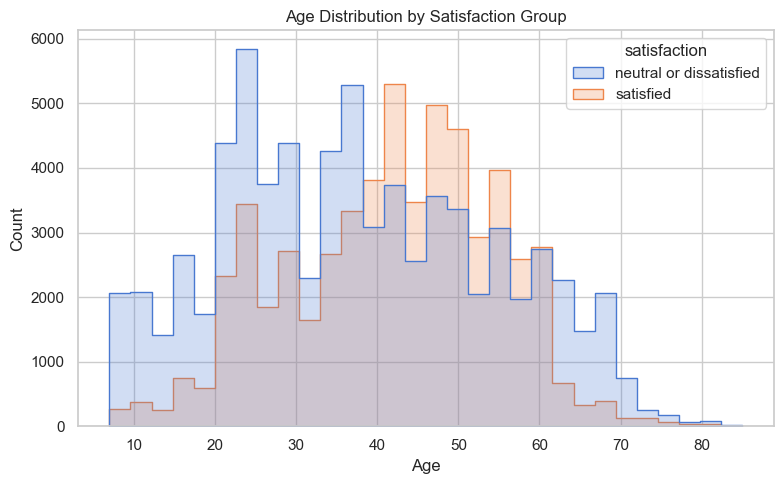

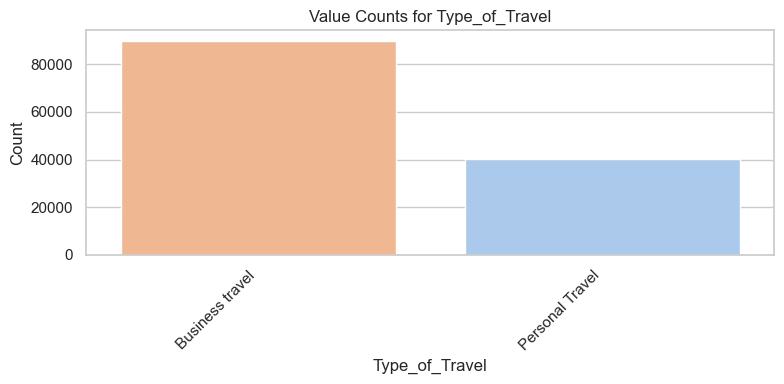

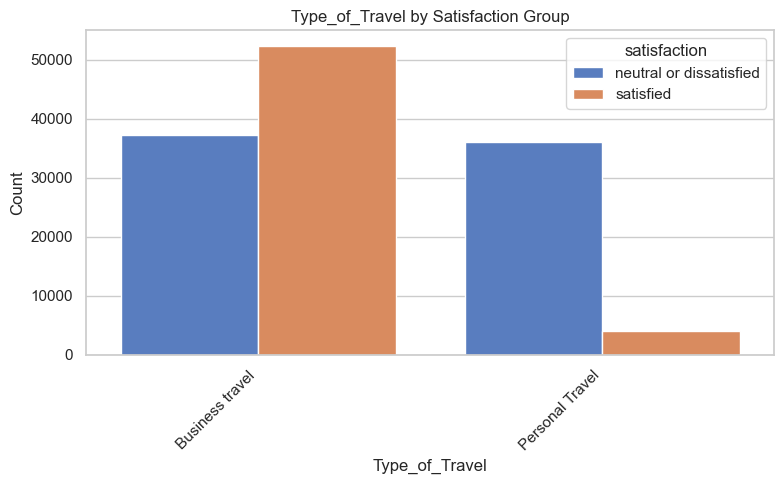

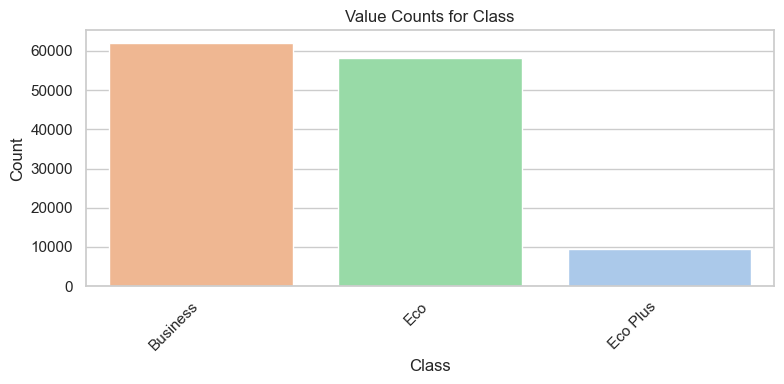

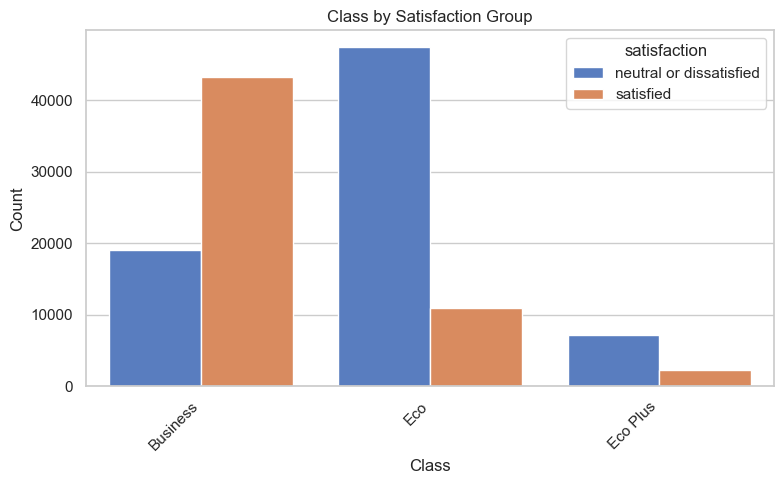

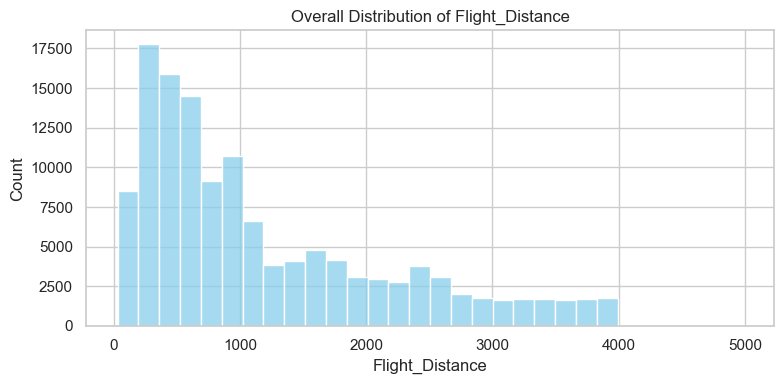

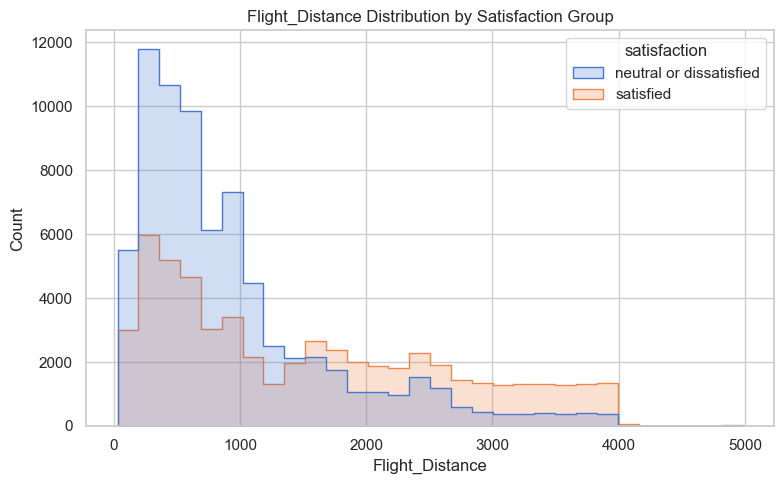

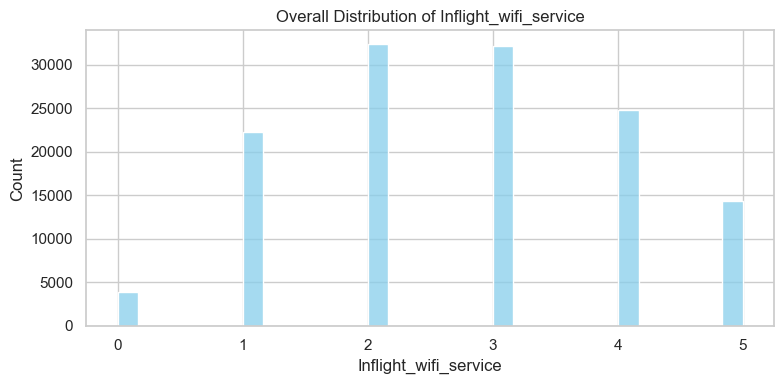

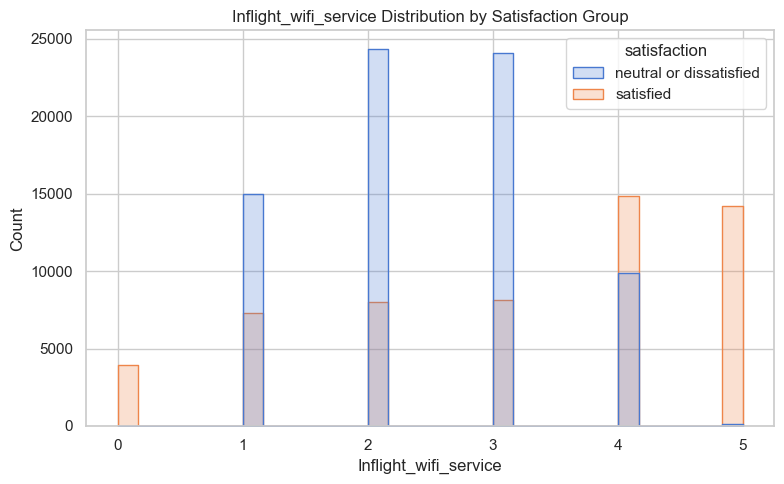

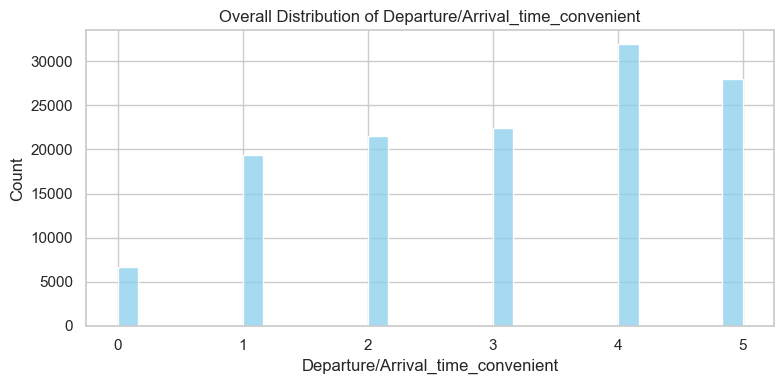

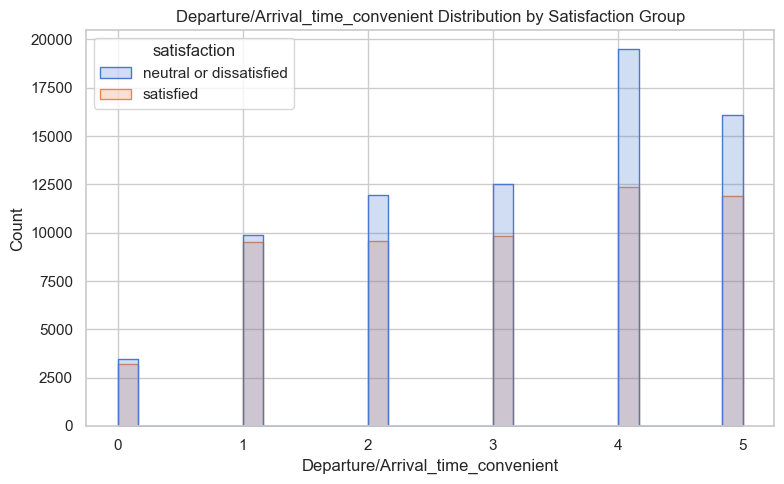

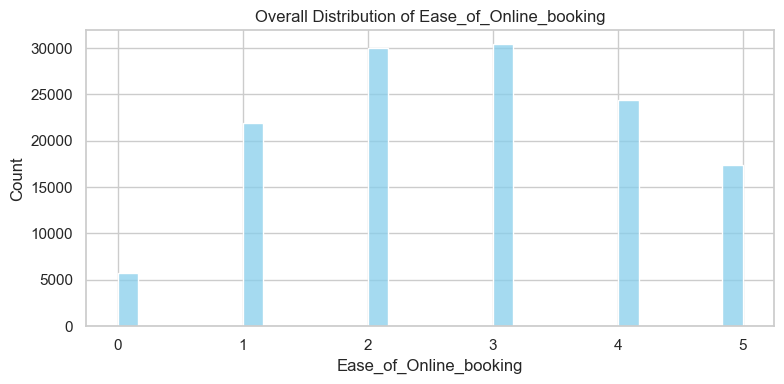

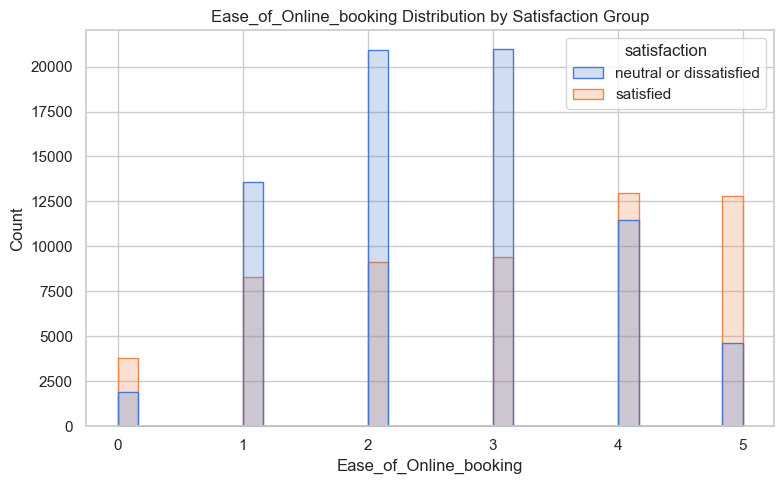

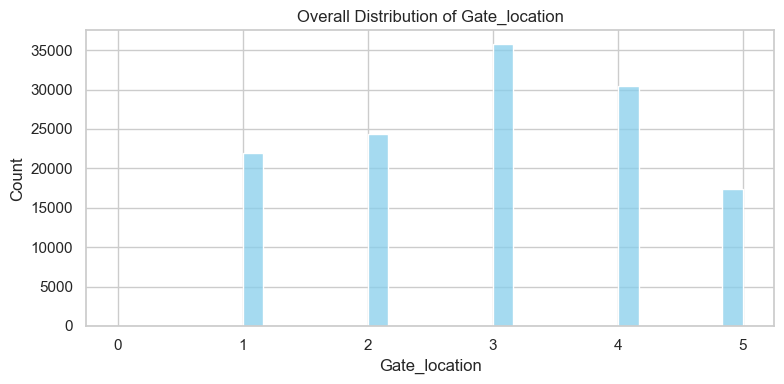

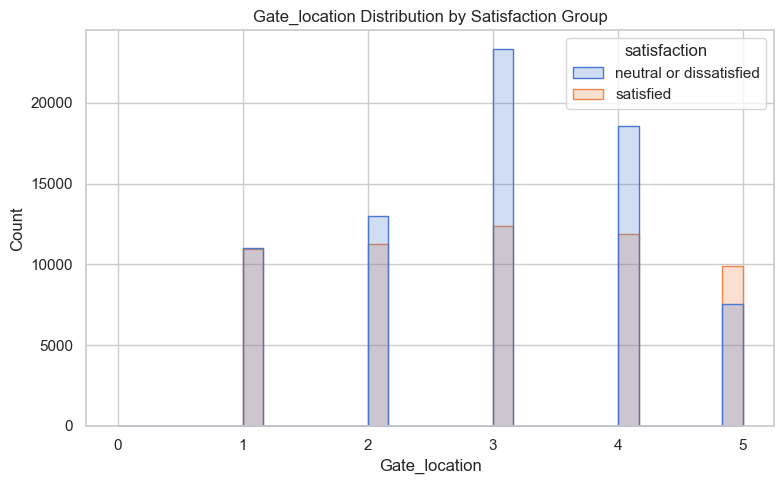

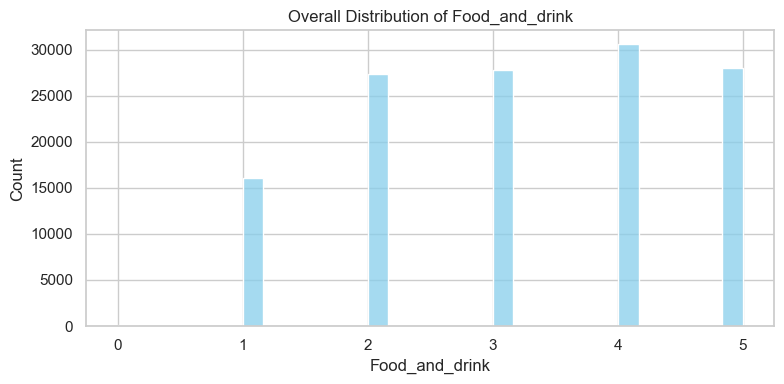

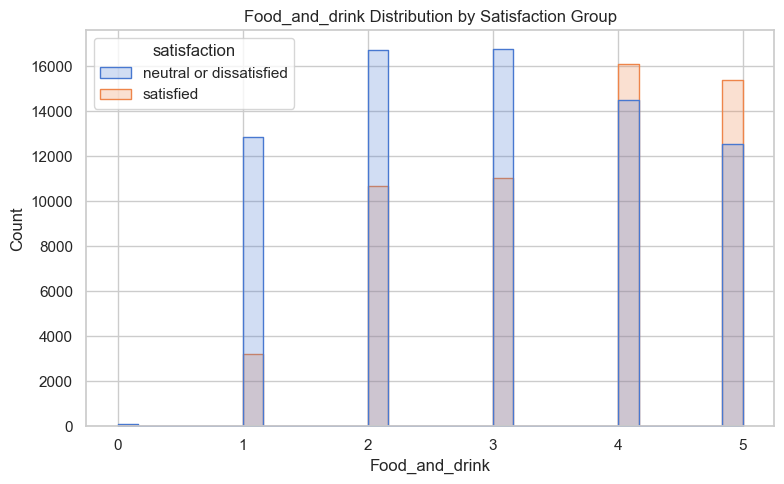

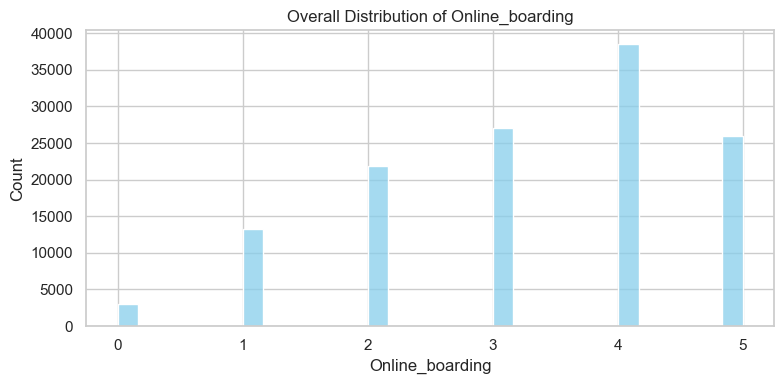

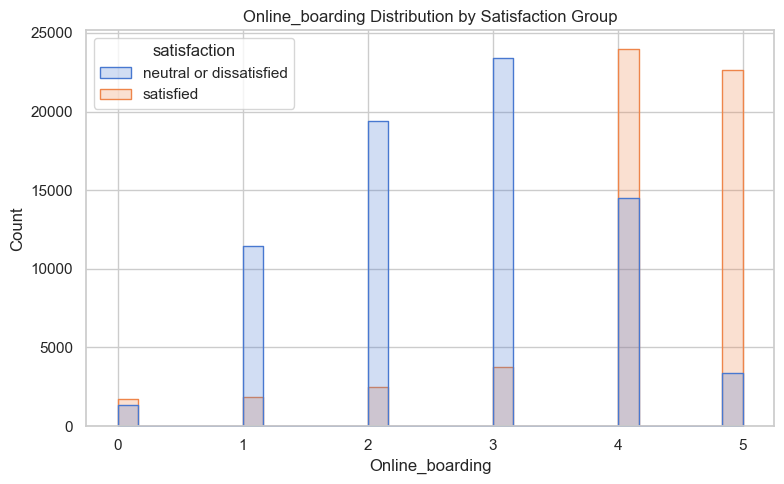

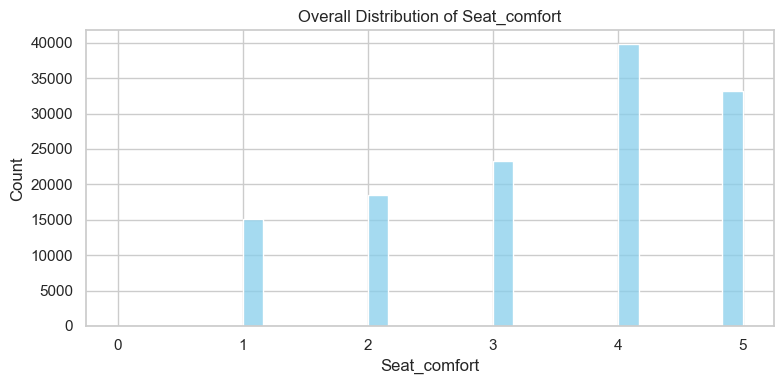

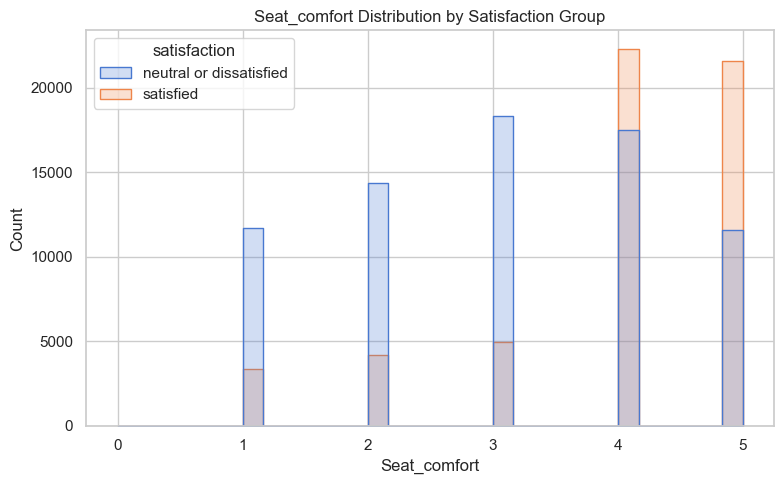

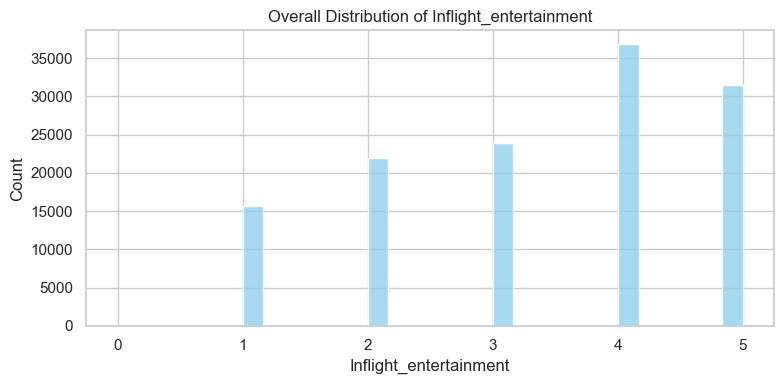

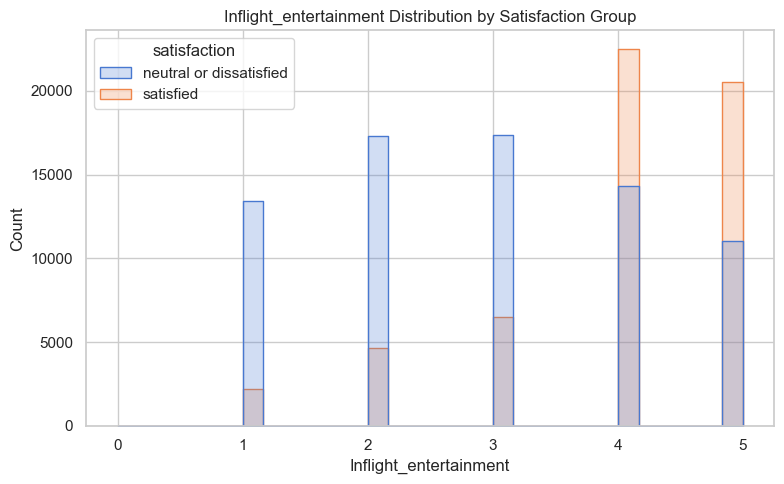

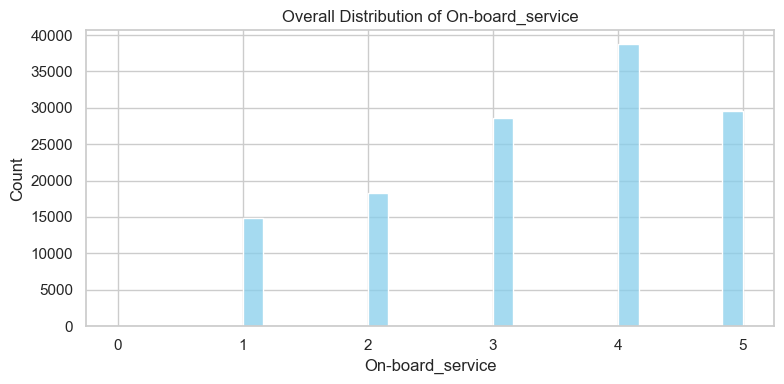

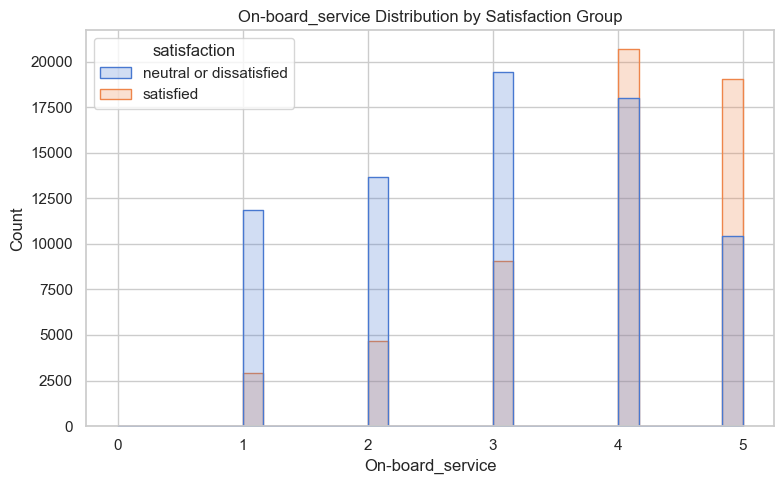

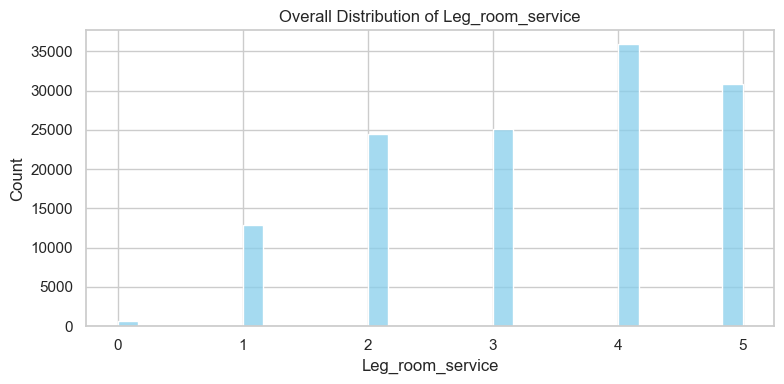

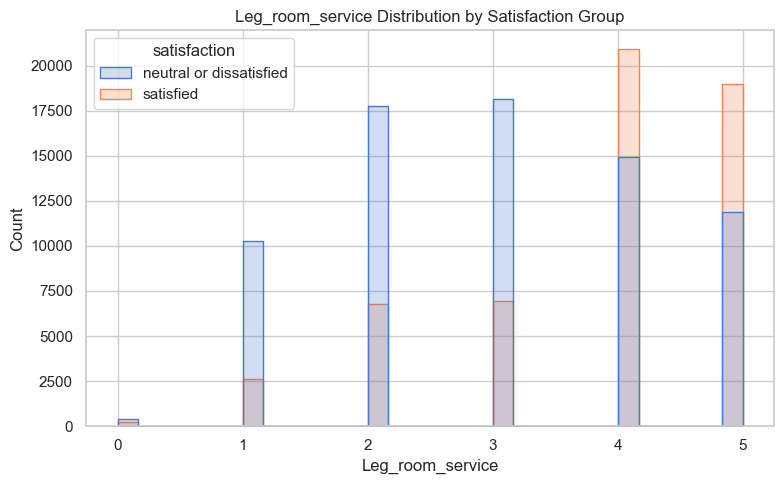

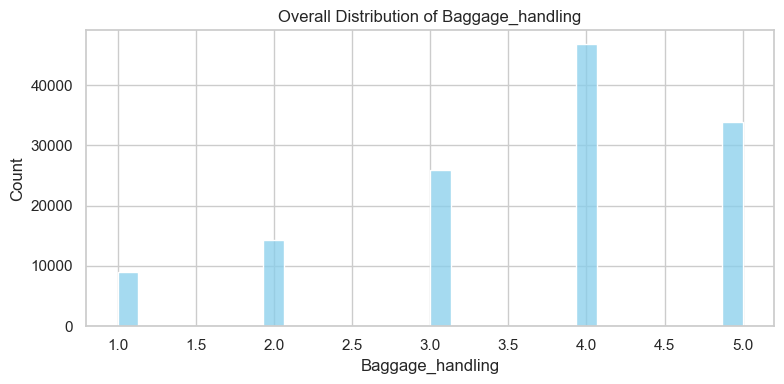

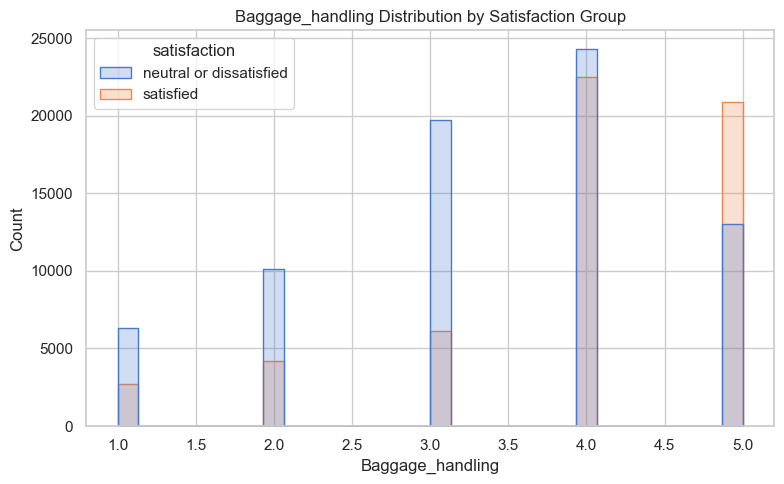

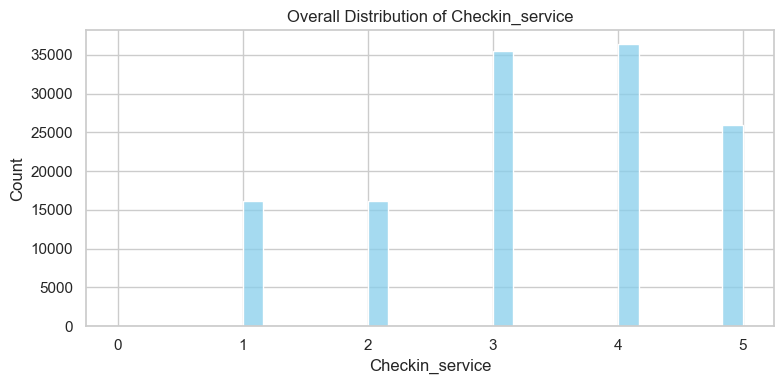

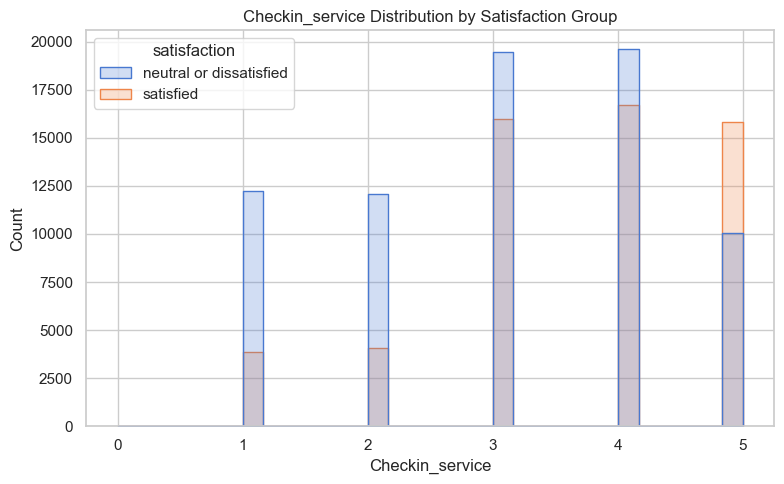

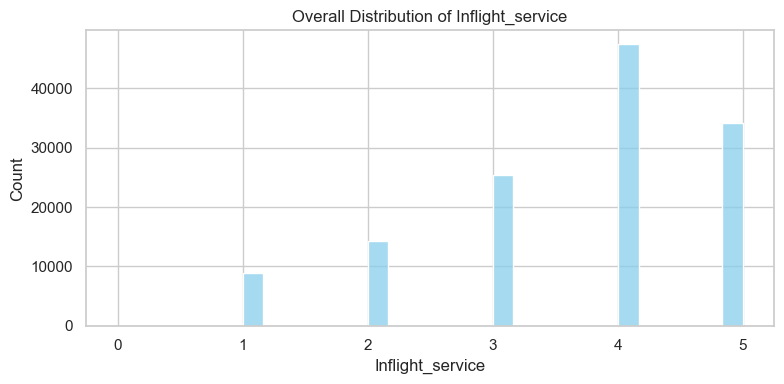

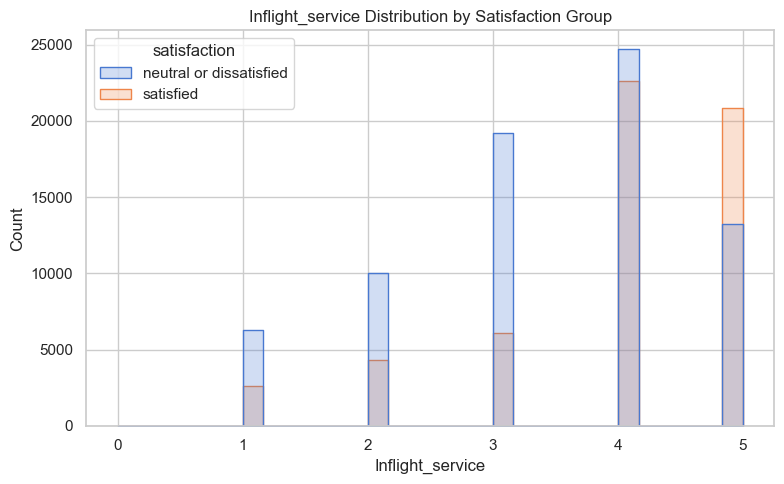

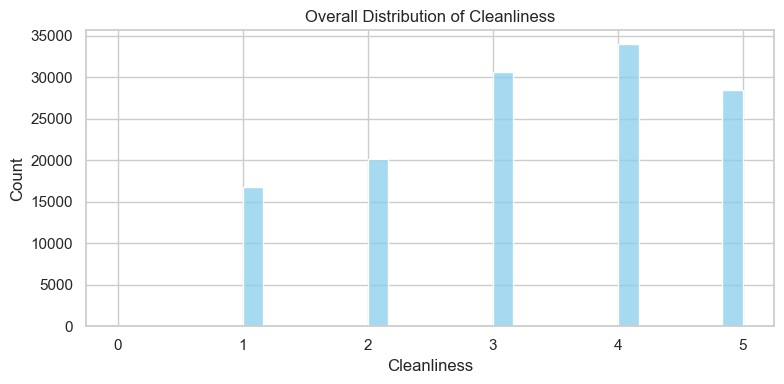

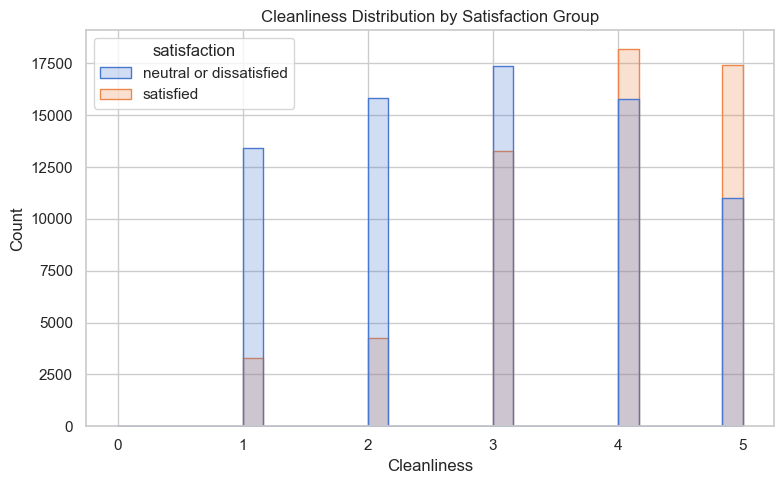

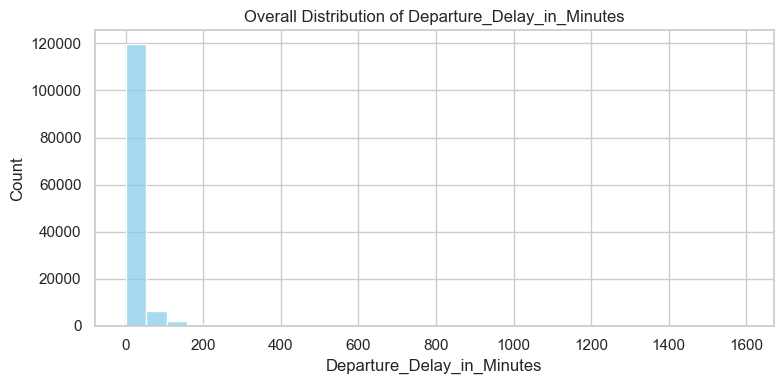

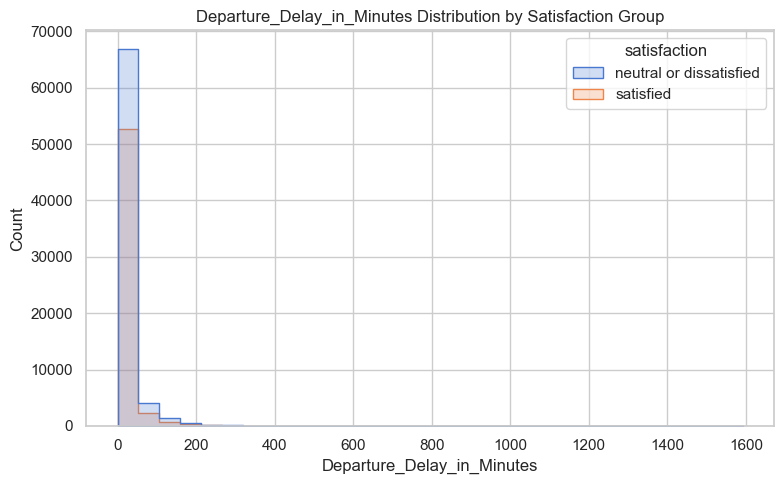

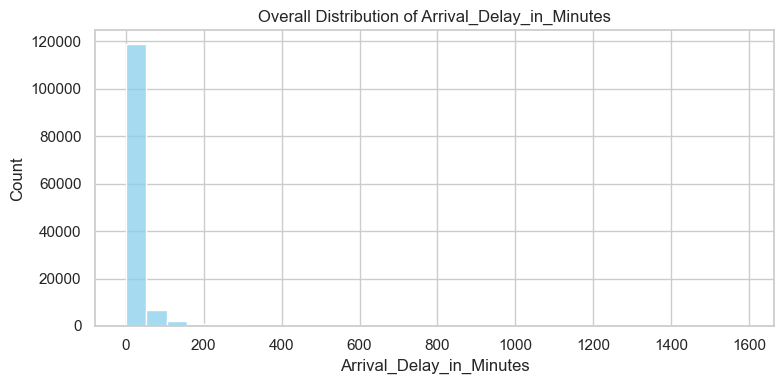

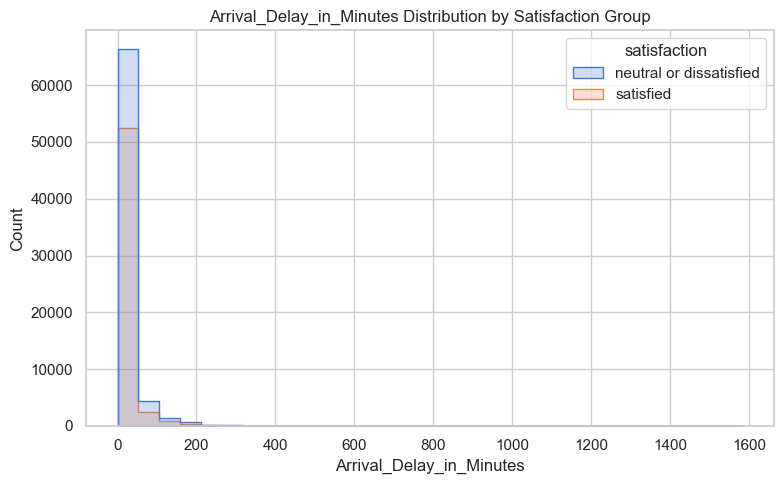

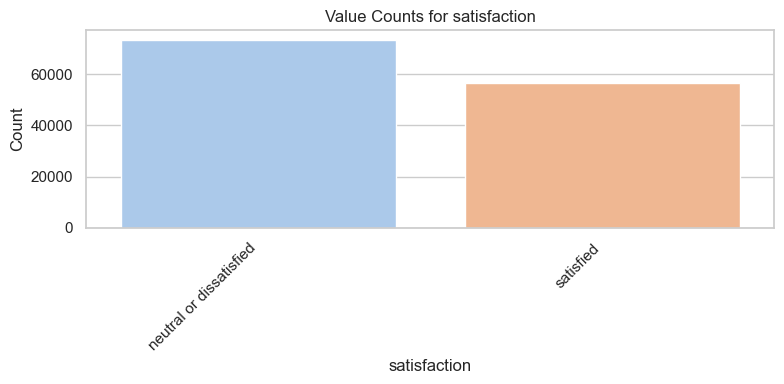

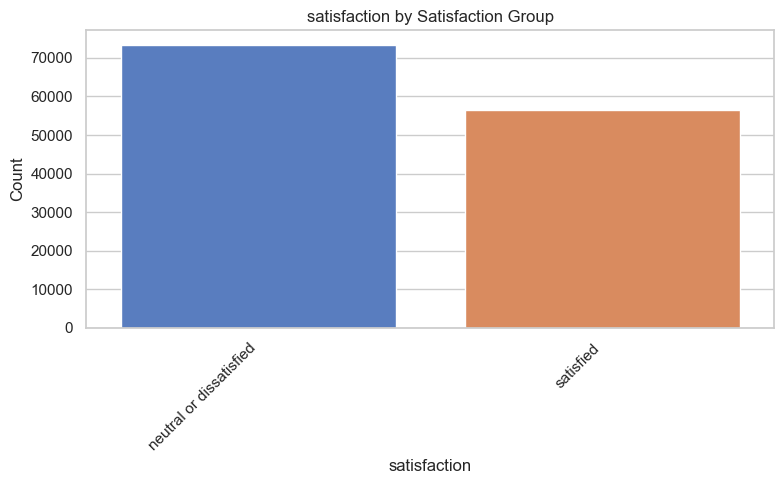

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AirlineSatisfaction_Transformed.csv")
sns.set(style="whitegrid")

for col in df.columns:
    dtype = df[col].dtype

    if pd.api.types.is_numeric_dtype(dtype):
    #If it's numeric run distribution histograms
        #Overall distribution
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=30, color="skyblue")
        plt.title(f"Overall Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        #Grouped by satisfaction
        plt.figure(figsize=(8, 5))
        sns.histplot(
            data=df,
            x=col,
            hue="satisfaction",
            bins=30,
            element="step",
            stat="count",
            common_norm=False,
            palette="muted"
        )
        plt.title(f"{col} Distribution by Satisfaction Group")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    elif pd.api.types.is_object_dtype(dtype) or pd.api.types.is_categorical_dtype(dtype):
    #If it's categorical instead of numeric then now we'll run the counts

        #Overall
        plt.figure(figsize=(8, 4))
        sns.countplot(
            data=df,
            x=col,
            hue=col,
            order=df[col].value_counts().index,
            palette="pastel",
            legend=False
        )
        plt.title(f"Value Counts for {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        #by satisfaction
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=df,
            x=col,
            hue="satisfaction",
            order=df[col].value_counts().index,
            palette="muted"
        )
        plt.title(f"{col} by Satisfaction Group")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


Optimization terminated successfully.
         Current function value: 0.334868
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               103589
Model:                          Logit   Df Residuals:                   103565
Method:                           MLE   Df Model:                           23
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.5108
Time:                        00:30:48   Log-Likelihood:                -34689.
converged:                       True   LL-Null:                       -70911.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.7439      0.075    -76

C:\Users\guy74\AppData\Local\Temp\ipykernel_16992\4104577527.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(100), x="Coefficient", y="Feature", palette="coolwarm")


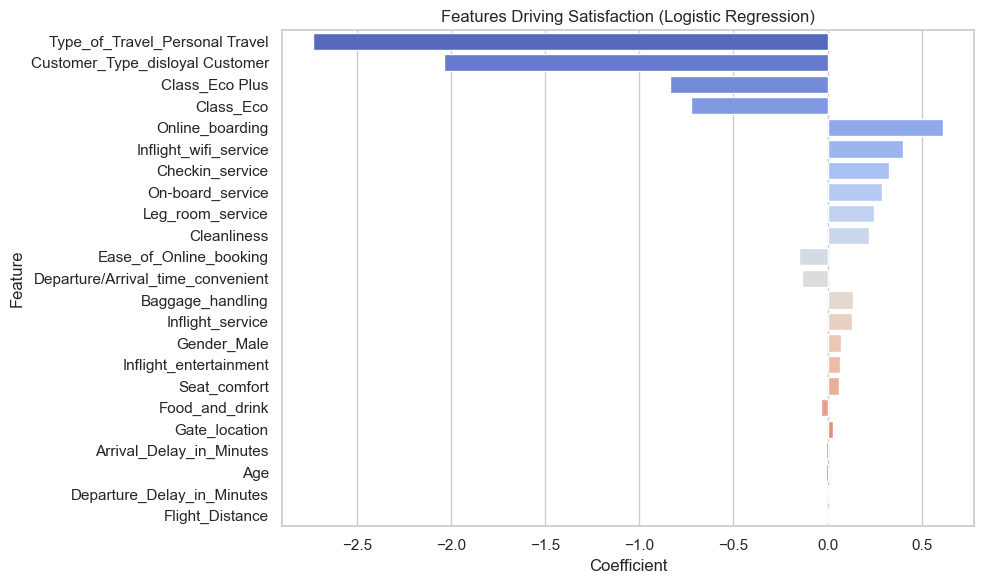

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("AirlineSatisfaction_Transformed.csv")

#Drop rows with missing values (will only drop due to Arrival Delay in Minutes, for only 393 observations)
df = df.dropna()

#Encode target variable for satisfaction; 1 for satisfied and 0 if not
df["satisfaction_binary"] = df["satisfaction"].apply(lambda x: 1 if x.strip().lower() == "satisfied" else 0)

#Build logistic regression model
X = df.drop(columns=["satisfaction", "satisfaction_binary"])
y = df["satisfaction_binary"]
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

logreg_pipeline.fit(X_train, y_train)

#Also adding a section to output the actual statistics about the fitted model so we can examine them
#But looks like we can't get it from sklearn so instead have to use statsmodels for this use-case
import statsmodels.api as sm
X_train_encoded = preprocessor.fit_transform(X_train)



#Looks like I had an issue with order of operations from the kernal persisting over time... 
#need to establish all_feature_names first here before we can use it to build the data frame below
ohe = logreg_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([ohe_feature_names, numeric_cols])


#Build DataFrame for statsmodels with column names
X_train_df = pd.DataFrame(
    X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded,
    columns=all_feature_names
)


#Add intercept manually
X_train_df = sm.add_constant(X_train_df)
#Fit statsmodels logistic regression
sm_model = sm.Logit(y_train.values, X_train_df)
sm_result = sm_model.fit()

#Print detailed model statistical summary (coefficients and p values visible etc...)
print(sm_result.summary())


#Get variable names again post encoding
ohe = logreg_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([ohe_feature_names, numeric_cols])

#grab coefficients
coefficients = logreg_pipeline.named_steps["classifier"].coef_[0]
coef_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=np.abs, ascending=False)

#Plot the top 100 variables/features (so should just show all of them unless we exceed this high cap but we will not here)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(100), x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Features Driving Satisfaction (Logistic Regression)")
plt.tight_layout()
plt.show()


#Now the only message left is a future warning so nbd


<Figure size 600x600 with 0 Axes>

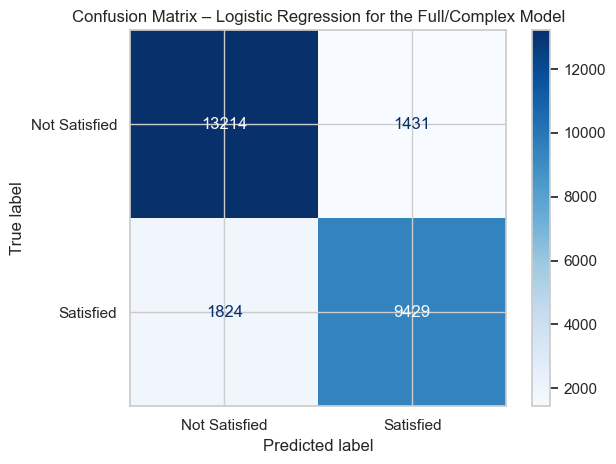

Accuracy: 0.8743146188894896
Precision: 0.868232044198895
Recall: 0.8379098906958145
F1 Score: 0.8528015194681862


In [210]:
#Finally test out how the "big model" is doing but we will likely want to trim this down in our next iteration(s) 
#(to avoid overfitting but still try to retain as much explanatory power as possible with as much simplicity as possible)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score #add f1

#Predict on the test set
y_pred = logreg_pipeline.predict(X_test)

#Build out a confusion matrix and print the accuracy, precision, and recall
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Satisfied", "Satisfied"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix – Logistic Regression for the Full/Complex Model")
plt.tight_layout()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))  #Adding F1


In [211]:
#As seen above, good performance on the unseen testing data still, but likely more complexity than desired in this model
#More to come in future iterations

In [212]:
#Next I want to use some code to find the ACTUAL best subset of variables to use for our parsimonious model
#Brute forcing all models to analyze the AIC but only for combinations from 1 through 4 variables 
#NOTE first approach was flawed but this take is matching AIC's now
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import combinations
from tqdm import tqdm #Lets us make progress bars during the run

df = pd.read_csv("AirlineSatisfaction_Transformed.csv").dropna()
df["satisfaction_binary"] = df["satisfaction"].apply(lambda x: 1 if x.strip().lower() == "satisfied" else 0)
exclude = ["Unnamed: 0", "id", "satisfaction", "satisfaction_binary"]
candidate_vars = [col for col in df.columns if col not in exclude]
from sklearn.model_selection import train_test_split
X = df[candidate_vars]
y = df["satisfaction_binary"]
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


results = []

#Loop over all combinations of 1 to 4 variables, fit them, get AIC
for k in range(1, 5):
    for combo in tqdm(list(combinations(candidate_vars, k)), desc=f"Evaluating combinations of {k} variables"):
        try:
            X_combo = X_train[list(combo)].copy()
            X_encoded = pd.get_dummies(X_combo, drop_first=True)
            X_encoded = sm.add_constant(X_encoded)
            model = sm.Logit(y_train, X_encoded).fit(disp=False)
            results.append({
                "Num_Vars": k,
                "Variables": combo,
                "AIC": model.aic
            })

        except Exception as e:
            continue

#Sort by the AIC and convert to a dataframe
aic_df = pd.DataFrame(results).sort_values(by="AIC").reset_index(drop=True)


print("\nTop 10 models by AIC:")
print(aic_df.head(10))



Evaluating combinations of 4 variables: 100%|██████████| 7315/7315 [08:24<00:00, 14.50it/s]


Top 10 models by AIC:
   Num_Vars  \
0         4   
1         4   
2         4   
3         4   
4         4   
5         4   
6         4   
7         4   
8         4   
9         4   

                                                                                        Variables  \
0                    (Flight_Distance, Online_boarding, Inflight_entertainment, Leg_room_service)   
1                    (Flight_Distance, Online_boarding, Inflight_entertainment, On-board_service)   
2                          (Flight_Distance, Online_boarding, On-board_service, Leg_room_service)   
3                   (Online_boarding, Inflight_entertainment, On-board_service, Leg_room_service)   
4                    (Online_boarding, Inflight_entertainment, Leg_room_service, Checkin_service)   
5                     (Flight_Distance, Online_boarding, Inflight_entertainment, Checkin_service)   
6  (Departure/Arrival_time_convenient, Online_boarding, Inflight_entertainment, Leg_room_service)   
7  

In [213]:
#Using that full list of all the AICs by each model to examine some of the other ones as well and clean up some formatting etc
pd.options.display.max_colwidth = None
top_models = aic_df.sort_values(by='AIC').head(30).copy()
#top_models = aic_df.sort_values(by='AIC').tail(30).copy()
top_models['Variables'] = top_models['Variables'].apply(lambda x: ", ".join(x))
print(top_models)


    Num_Vars  \
0          4   
1          4   
2          4   
3          4   
4          4   
5          4   
6          4   
7          4   
8          4   
9          4   
10         4   
11         4   
12         4   
13         4   
14         4   
15         4   
16         4   
17         4   
18         4   
19         4   
20         4   
21         4   
22         4   
23         4   
24         4   
25         4   
26         4   
27         4   
28         3   
29         4   

                                                                                       Variables  \
0                     Flight_Distance, Online_boarding, Inflight_entertainment, Leg_room_service   
1                     Flight_Distance, Online_boarding, Inflight_entertainment, On-board_service   
2                           Flight_Distance, Online_boarding, On-board_service, Leg_room_service   
3                    Online_boarding, Inflight_entertainment, On-board_service, Leg_room_service   
4  

In [214]:
#Next I want to compare the three models using AIC and the confusion matrix from earlier now to illustrate further in the deck
#he full/complex one, the hypothesized one from the beginning of the project, and the most parsimonious <=4 variable one by AIC found via the loop


Optimization terminated successfully.
         Current function value: 0.516501
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               103589
Model:                          Logit   Df Residuals:                   103583
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.2455
Time:                        00:41:14   Log-Likelihood:                -53504.
converged:                       True   LL-Null:                       -70911.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1447      0.029    -39.935      0.000      -1.201

<Figure size 600x600 with 0 Axes>

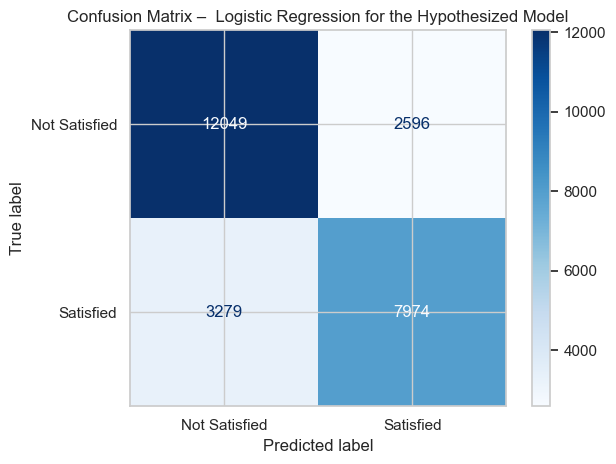

Accuracy: 0.773148505676114
Precision: 0.754399243140965
Recall: 0.7086110370567849


In [215]:
#This version for the hypothesized model from the beginning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("AirlineSatisfaction_Transformed.csv")
df = df.dropna()
df["satisfaction_binary"] = df["satisfaction"].apply(lambda x: 1 if x.strip().lower() == "satisfied" else 0)

#Selecting only specific variables now. Going to first run this for my hypothesized variables from the beginning of this project
selected_vars = ["Class", "On-board_service", "Inflight_service", "Arrival_Delay_in_Minutes"]
X = df[selected_vars].copy()
y = df["satisfaction_binary"]


#Build hypothesized model
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
logreg_pipeline.fit(X_train, y_train)

X_train_encoded = preprocessor.fit_transform(X_train)

#Get column names after encoding
ohe = preprocessor.transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([ohe_feature_names, numeric_cols])

#Fit model
X_train_df = pd.DataFrame(
    X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded,
    columns=all_feature_names
)
X_train_df = sm.add_constant(X_train_df)
sm_model = sm.Logit(y_train.values, X_train_df)
sm_result = sm_model.fit()

#Show the stats
print(sm_result.summary())

print(f"\nAIC for Hypothesized Model: {sm_result.aic:.2f}")



#And also the confusion matrix
#Next output the confusion matrix for the hypothesized model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

#Predict probabilities on test set
X_test_hypo_encoded = preprocessor.transform(X_test[selected_vars])
X_test_hypo_df = pd.DataFrame(
    X_test_hypo_encoded.toarray() if hasattr(X_test_hypo_encoded, 'toarray') else X_test_hypo_encoded,
    columns=all_feature_names
)
X_test_hypo_df = sm.add_constant(X_test_hypo_df)

#Predict class labels using threshold 0.5
y_pred_hypo = sm_result.predict(X_test_hypo_df) > 0.5

#Build confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred_hypo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Satisfied", "Satisfied"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix –  Logistic Regression for the Hypothesized Model")
plt.tight_layout()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_hypo))
print("Precision:", precision_score(y_test, y_pred_hypo))
print("Recall:", recall_score(y_test, y_pred_hypo))





In [216]:
#Finally below now we do the same for the most parsimonious model we found via the AIC loop

Optimization terminated successfully.
         Current function value: 0.453653
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               103589
Model:                          Logit   Df Residuals:                   103584
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.3373
Time:                        00:41:16   Log-Likelihood:                -46993.
converged:                       True   LL-Null:                       -70911.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.9007      0.043   -161.362      0.000      -6.985      

<Figure size 600x600 with 0 Axes>

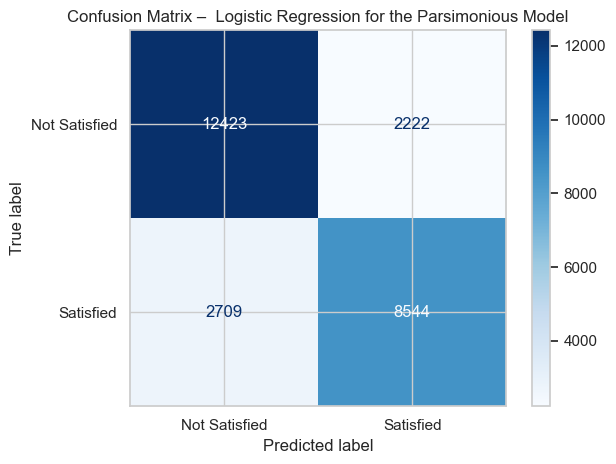

Accuracy: 0.8095991968491776
Precision: 0.793609511424856
Recall: 0.7592641962143428


In [217]:
#This version for the most parsimonious model discovered by the loop of all models <=4 variables combinations and lowest AIC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("AirlineSatisfaction_Transformed.csv")
df = df.dropna()
df["satisfaction_binary"] = df["satisfaction"].apply(lambda x: 1 if x.strip().lower() == "satisfied" else 0)

#Selecting only specific variables now. Now these are changed to the Parsimonious model ones instead of the hypothesized ones
selected_vars = ["Flight_Distance", "Online_boarding", "Inflight_entertainment", "Leg_room_service"]
X = df[selected_vars].copy()
y = df["satisfaction_binary"]


#Build parsimonious model
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
logreg_pipeline.fit(X_train, y_train)


preprocessor.fit(X_train)  # Fit the preprocessor explicitly
X_train_encoded = preprocessor.transform(X_train)


# Get column names after encoding
if categorical_cols:
    ohe = fitted_preprocessor.named_transformers_['cat']
    ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
    all_feature_names = np.concatenate([ohe_feature_names, numeric_cols])
else:
    all_feature_names = numeric_cols


#Fit model
X_train_df = pd.DataFrame(
    X_train_encoded.toarray() if hasattr(X_train_encoded, "toarray") else X_train_encoded,
    columns=all_feature_names
)
X_train_df = sm.add_constant(X_train_df)
sm_model = sm.Logit(y_train.values, X_train_df)
sm_result = sm_model.fit()

#Show the stats
print(sm_result.summary())

print(f"\nAIC for Parsimonious Model: {sm_result.aic:.2f}")



#And also the confusion matrix
#Next output the confusion matrix for the Parsimonious model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

#Predict probabilities on test set
X_test_pars_encoded = preprocessor.transform(X_test[selected_vars])
X_test_pars_df = pd.DataFrame(
    X_test_pars_encoded.toarray() if hasattr(X_test_pars_encoded, 'toarray') else X_test_pars_encoded,
    columns=all_feature_names
)
X_test_pars_df = sm.add_constant(X_test_pars_df)

#Predict class labels using threshold 0.5
y_pred_pars = sm_result.predict(X_test_pars_df) > 0.5

#Build confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred_pars)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Satisfied", "Satisfied"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix –  Logistic Regression for the Parsimonious Model")
plt.tight_layout()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_pars))
print("Precision:", precision_score(y_test, y_pred_pars))
print("Recall:", recall_score(y_test, y_pred_pars))








In [218]:
#Another attempt at automatic feature selection to see about an effective way to test other combinations in a performant way
#i.e. we can try >4 variable combinations without taking way too long to run
#So this time instead of a brute force loop to get AIC using forward stepwise AIC selection

In [219]:
#Run the full model and then also run the automatic selection using stepwise 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Prep
df = pd.read_csv("AirlineSatisfaction_Transformed.csv").dropna()
df["satisfaction_binary"] = df["satisfaction"].apply(lambda x: 1 if x.strip().lower() == "satisfied" else 0)
X_raw = df.drop(columns=["satisfaction", "satisfaction_binary"])
y = df["satisfaction_binary"]
categorical_cols = X_raw.select_dtypes(include="object").columns.tolist()
numeric_cols = X_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numeric_cols)
])

X_encoded = preprocessor.fit_transform(X_raw)
ohe = preprocessor.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_feature_names, numeric_cols])

X_df = pd.DataFrame(
    X_encoded.toarray() if hasattr(X_encoded, "toarray") else X_encoded,
    columns=all_feature_names,
    index=X_raw.index
)

#Full/complex model
X_full_sm = sm.add_constant(X_df)
full_model = sm.Logit(y, X_full_sm).fit()
print("=== Full/Complex Model ===")
print(f"AIC: {full_model.aic:.2f}")

#Forward stepwise AIC selection model
remaining = list(all_feature_names)
selected = []
current_aic = np.inf

print("\n=== Forward Stepwise AIC Selection ===")
while True:
    improved = False
    best_candidate = None
    best_aic = current_aic

    for candidate in remaining:
        try_vars = selected + [candidate]
        X_try = sm.add_constant(X_df[try_vars])
        model_try = sm.Logit(y, X_try).fit(disp=False)
        if model_try.aic < best_aic:
            improved = True
            best_candidate = candidate
            best_aic = model_try.aic
    if improved:
        selected.append(best_candidate)
        remaining.remove(best_candidate)
        current_aic = best_aic
        print(f"Added: {best_candidate}, AIC: {current_aic:.2f}")
    else:
        break

#Final stepwise model
X_stepwise = sm.add_constant(X_df[selected])
stepwise_model = sm.Logit(y, X_stepwise).fit()
print("\n=== Final Stepwise Model ===")
print(f"AIC: {stepwise_model.aic:.2f}")
print("Selected Variables:", selected)

# === Final Comparison Summary ===
print("\n=== Model AIC Comparison ===")
print(f"Full Model AIC: {full_model.aic:.2f}")
print(f"Stepwise Model AIC: {stepwise_model.aic:.2f}")

if stepwise_model.aic < full_model.aic:
    print("Stepwise model has lower AIC (more parsimonious and better fit).")
elif stepwise_model.aic == full_model.aic:
    print("Stepwise model matches full model AIC.")
else:
    print("Full model has lower AIC, problematic result? Stepwise selection did not improve fit.")

#Interesting, appears our best bet is still technically the full model even in terms of AIC when trying to penalize complexity
#i.e. the predictive power by adding all of these is still stronger than the penalty


Optimization terminated successfully.
         Current function value: 0.334658
         Iterations 7
=== Full/Complex Model ===
AIC: 86715.67

=== Forward Stepwise AIC Selection ===
Added: Online_boarding, AIC: 139840.85
Added: Type_of_Travel_Personal Travel, AIC: 117244.50
Added: On-board_service, AIC: 106824.45
Added: Customer_Type_disloyal Customer, AIC: 99070.72
Added: Checkin_service, AIC: 95976.48
Added: Inflight_entertainment, AIC: 93174.51
Added: Leg_room_service, AIC: 91330.94
Added: Inflight_wifi_service, AIC: 90678.33
Added: Class_Eco, AIC: 89863.01
Added: Departure/Arrival_time_convenient, AIC: 89200.82
Added: Class_Eco Plus, AIC: 88630.40
Added: Arrival_Delay_in_Minutes, AIC: 88192.40
Added: Cleanliness, AIC: 87716.46
Added: Baggage_handling, AIC: 87313.04
Added: Ease_of_Online_booking, AIC: 87100.88
Added: Age, AIC: 86923.87
Added: Inflight_service, AIC: 86798.60
Added: Seat_comfort, AIC: 86762.66
Added: Departure_Delay_in_Minutes, AIC: 86741.88
Added: Gender_Male, AIC: 

In [220]:
#Next during week 4 going to work on the SVM portion now first and then get into the actual week 4 additions
#(Feedback from last submission indciated we should have SVM included)

LinearSVR Results:
Mean Squared Error (MSE): 0.4336
Mean Absolute Error (MAE): 0.4336
R² Score: -0.7656


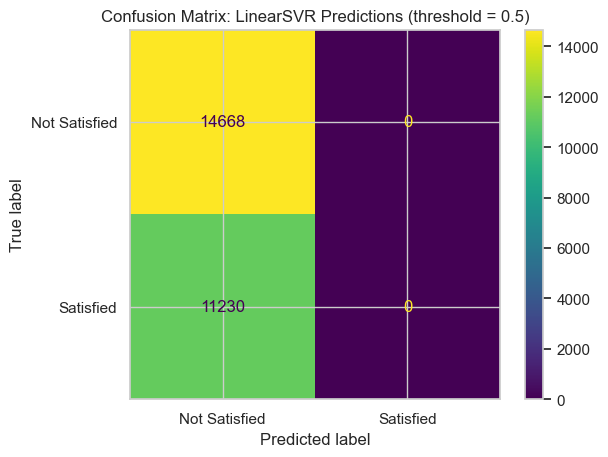

Accuracy: 56.64%
Precision: 0.00%
Recall: 0.00%


In [221]:
#NOTE RETAINING THIS CELL FOR FUTURE POSTERITY JUST IN CASE BUT THIS APPROACH TO SVC APPEARS TO BE FLAWED, INSTEAD OF SVR I THINK SHOULD BE SVC


#In support of the SVM model/code below now setting things up here again using the encoded dataframe from the above cell where we did logistic regression
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


#Use the  existing preprocessed features and binary satisfaction target
X = X_df
y = df["satisfaction_binary"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Fit SVM model
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

#Predict using the model on the test set
y_pred = svm_reg.predict(X_test)

#Get and print the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LinearSVR Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


#Also adding a confusion matrix so we can compare them more apples to apples/similar methodology of comparison for the various models as we used above for LR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_binary = (y_pred >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Satisfied", "Satisfied"])
disp.plot()
plt.title("Confusion Matrix: LinearSVR Predictions (threshold = 0.5)")
plt.show()


#Print out the accuracy, precision, and recall metrics just like before with the LR models as well
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_pred_binary):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_binary, zero_division=0):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_binary, zero_division=0):.2%}")




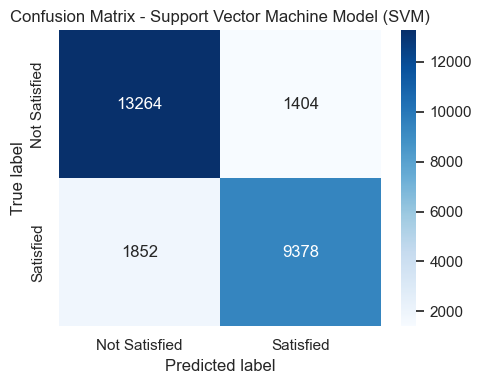

Accuracy: 0.8743
Precision: 0.8698
Recall: 0.8351
F1 Score: 0.8521


In [249]:
#In support of the SVM model/code below now setting things up here again using the dataframe(s) from the above cell where we did logistic regression
#Ahhh upon further investigation it appears we should not be using the LinearSVR thing since that is really build for regressions on continuous variables 
#The learning activity sort of tripped me up at first because it appears to be telling us to use it that way 
#But I think the true intent is for us to use linearSVC instead(???)
#Yep! This is looking much better, clearing out the failed attempt cells above and proceed with this version


from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import f1_score 


from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Train SVM classifier
svm_clf = LinearSVC(max_iter=10000, random_state=42)

#Confusion matrix is like an order of magnitude larger??? 
#Oh I see the problem now, we need to fit it on the training set and only run the predictions on the test set
#svm_clf.fit(X_df, y)

#Train on training set
svm_clf.fit(X_train, y_train)

#Predict on training set
#y_pred = svm_clf.predict(X_df)
#Predict on test set
y_pred = svm_clf.predict(X_test)



#Output the metrics as well as a similar confusion matrix so we can compare them more apples to apples
#(similar methodology of comparison for the various models as we used above for LR)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)  #Adding F1 as this may be considered the most appropriate metric to use for this classification cross model type analysis

#Not really as applicable for non regression but leave in for now at least consistent
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.title("Confusion Matrix - Support Vector Machine Model (SVM)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()



#print("LinearSVC Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")  #Add F1

#print(f"Mean Squared Error (MSE): {mse:.4f}")
#print(f"Mean Absolute Error (MAE): {mae:.4f}")
#print(f"R² Score: {r2:.4f}")





In [ ]:
#Now finally hitting the week 4 intended stuff for the Deep Learning Recurrent Neural Network 
#But I guess I have to figure out how to run this in collab instead of locally from my machine
#Set up and played with colab but decided I am first going to attempt running this locally since it will require less re-work
#even if the runs take a bit longer, as long as it's a matter of minutes and not hours, I'm fine with this

In [251]:
pip install tensorflow



   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   -- ------------------------------------ 21.8/376.0 MB 105.9 MB/s eta 0:00:04
   ---- ---------------------------------- 45.4/376.0 MB 111.1 MB/s eta 0:00:03
   ------- ------------------------------- 69.5/376.0 MB 113.6 MB/s eta 0:00:03
   --------- ----------------------------- 95.4/376.0 MB 110.8 MB/s eta 0:00:03
   ------------ ------------------------- 119.5/376.0 MB 112.3 MB/s eta 0:00:03
   -------------- ----------------------- 143.7/376.0 MB 113.4 MB/s eta 0:00:03
   ---------------- --------------------- 167.5/376.0 MB 112.7 MB/s eta 0:00:02
   ------------------- ------------------ 191.1/376.0 MB 113.1 MB/s eta 0:00:02
   --------------------- ---------------- 216.0/376.0 MB 114.2 MB/s eta 0:00:02
   ------------------------ ------------- 239.9/376.0 MB 114.4 MB/s eta 0:00:02
   -------------------------- ----------- 263.7/376.0 MB 114.8 MB/s eta 0:00:01
   ----------------------------- -------- 288.4/

In [253]:
import tensorflow as tf
print(tf.__version__)


2.19.0


Epoch 1/20


C:\Users\guy74\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8706 - loss: 0.3180 - val_accuracy: 0.9289 - val_loss: 0.1782
Epoch 2/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9315 - loss: 0.1713 - val_accuracy: 0.9347 - val_loss: 0.1617
Epoch 3/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9361 - loss: 0.1593 - val_accuracy: 0.9393 - val_loss: 0.1517
Epoch 4/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9397 - loss: 0.1485 - val_accuracy: 0.9415 - val_loss: 0.1447
Epoch 5/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9423 - loss: 0.1413 - val_accuracy: 0.9451 - val_loss: 0.1403
Epoch 6/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9459 - loss: 0.1372 - val_accuracy: 0.9452 - val_loss: 0.1355
Epoch 7/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9463 - loss: 0.1348 - val_accuracy: 0.9475 - val_loss: 0.1321
Epoch 8/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9489 - loss: 0.1287 - val_accurac

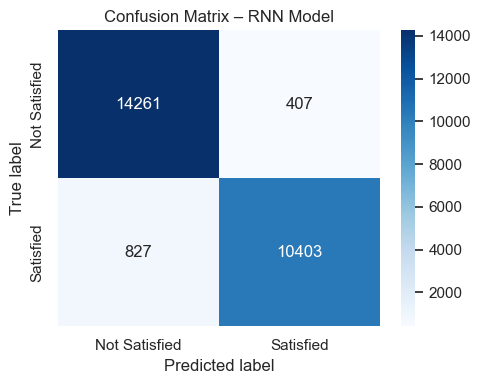

Accuracy: 0.9524
Precision: 0.9623
Recall: 0.9264
F1 Score: 0.9440


In [257]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, InputLayer

#Using the same dataframes we already created for the training/testing split from the models before
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

#Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Reshape data for RNN input: (samples, timesteps, features)
#We'll treat each row as a single timestep sequence to simulate a recurrent setup
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#Build the RNN model
model = Sequential()
model.add(InputLayer(input_shape=(1, X_train_scaled.shape[1])))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

#Predict and evaluate
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()



#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.title("Confusion Matrix – RNN Model")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


#Print evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

